# PROJET HMIN232 GROUPE AS

# LEFEVRE ALEXY

# BELAID MASSINISSA MOHAMED

# BELGHANEM RYADH

# Importation des libraries que nous allons utiliser

In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.stem import WordNetLemmatizer

import re
import contractions

import functools
import operator

class_label_encoder = LabelEncoder()

pd.options.display.max_colwidth = 200

# Importation du jeu de données

In [2]:
names = ["id","auteur","lien_auteur","nom_auteur","reclamation_examinee","date_examination","source","lien","pub_nom_auteur","pub_lien_auteur",
         "date_publication","contenu","extra_auteur","extra_contenu","extra_publication_examinée",
         "extra_mot_cle","extra_lien_reference","extra_tags","extra_titre","note_nom_alternatif","meilleure_note",
         "valeur_note","pire_note"]
df = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 1, nrows = 5000)
df2 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 5001, nrows = 5000)
df3 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 10001, nrows = 5000)
df4 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 15001, nrows = 5000)
df5 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 20001, nrows = 5000)
df6 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 25001, nrows = 5000)
df7 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 30001, nrows = 5000)


In [3]:
df = pd.concat([df, df2])
df = pd.concat([df, df3])
df = pd.concat([df, df4])
df = pd.concat([df, df5])
df = pd.concat([df, df6])
df = pd.concat([df, df7])


# Analyse des données

In [4]:
display(df.shape)
display(df.info())

(35000, 23)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          35000 non-null  int64  
 1   auteur                      0 non-null      float64
 2   lien_auteur                 35000 non-null  object 
 3   nom_auteur                  0 non-null      float64
 4   reclamation_examinee        35000 non-null  object 
 5   date_examination            34577 non-null  object 
 6   source                      35000 non-null  object 
 7   lien                        35000 non-null  object 
 8   pub_nom_auteur              16507 non-null  object 
 9   pub_lien_auteur             1303 non-null   object 
 10  date_publication            16479 non-null  object 
 11  contenu                     34965 non-null  object 
 12  extra_auteur                35000 non-null  object 
 13  extra_contenu               3500

None

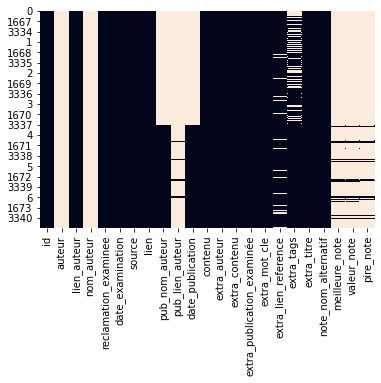

In [5]:
sns.heatmap(df.isnull(), cbar=False)

# On supprime les colonnes qui ont toutes les lignes Nan 

In [6]:
del df["auteur"]
del df["nom_auteur"]
del df["pub_lien_auteur"]
del df["meilleure_note"]
del df["valeur_note"]
del df["pire_note"]

In [7]:
display(df.sample(1))
df.shape

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,pub_nom_auteur,date_publication,contenu,extra_auteur,extra_contenu,extra_publication_examinée,extra_mot_cle,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
2920,4445,politifact,"Adding ethanol to gas """"raises food costs.""""",2012-04-06,politifact,http://www.politifact.com/tennessee/statements/2012/apr/06/james-durkan/tennessee-senate-candidate-says-putting-ethanol-ga/,James Durkan,2012-04-06,Whether or not it’s a good idea to add ethanol to gasoline is a debate that has been around for years. One of the key disputes has been the impact ethanol-infused gas has on food supplies and food...,[],"[{""id"" : 10048"",""""begin"": 39,""end"": 46,""entity"": ""Ethanol"",""text"": ""ethanol"",""score"": 0.42,""categories"" : [""Alcohol solvents"",""Anatomical preservation"",""Anxiolytics"",""Disinfectants"",""Drugs"",""Ethan...","[{""id"" : 10048"",""""begin"": 7,""end"": 14,""entity"": ""Ethanol"",""text"": ""ethanol"",""score"": 0.55,""categories"" : [""Alcohol solvents"",""Anatomical preservation"",""Anxiolytics"",""Disinfectants"",""Drugs"",""Ethano...",[],"https://www.politifact.com/wisconsin/statements/2011/may/29/wisconsin-corn-growers-association/wisconsin-corn-growers-association-says-without-et/,http://blogs.desmoinesregister.com/dmr/index.php/...","Agriculture,Energy",Tennessee Senate candidate says putting ethanol in gas raises the price of food,Mostly True


(35000, 17)

Nouveau nombre de lignes et colonnes 

In [8]:
display(df["extra_auteur"].describe())

count     35000
unique     2760
top          []
freq      21337
Name: extra_auteur, dtype: object

In [9]:
del df["extra_auteur"]

In [10]:
for column in df :
    print(column)
    display(df[column].describe())
    print("___________________")
    

id


count    35000.000000
mean      8761.581400
std       5100.141695
min          0.000000
25%       4358.750000
50%       8733.500000
75%      13108.250000
max      18474.000000
Name: id, dtype: float64

___________________
lien_auteur


count      35000
unique         3
top       snopes
freq       18475
Name: lien_auteur, dtype: object

___________________
reclamation_examinee


count                                                                                                       35000
unique                                                                                                      29246
top       NASA and NOAA faked climate data in the GISTEMP global temperature record to exaggerate global warming.
freq                                                                                                         1132
Name: reclamation_examinee, dtype: object

___________________
date_examination


count          34577
unique          4846
top       2019-10-04
freq            2273
Name: date_examination, dtype: object

___________________
source


count      35000
unique         3
top       snopes
freq       18475
Name: source, dtype: object

___________________
lien


count                                                                  35000
unique                                                                 29301
top       https://www.snopes.com/fact-check/bill-nye-arrested-illegal-drugs/
freq                                                                    1132
Name: lien, dtype: object

___________________
pub_nom_auteur


count            16507
unique            4142
top       Donald Trump
freq               734
Name: pub_nom_auteur, dtype: object

___________________
date_publication


count          16479
unique          3809
top       2011-10-11
freq              26
Name: date_publication, dtype: object

___________________
contenu


count                                                                                                                                                                                                       34965
unique                                                                                                                                                                                                      29251
top       An Oct. 3, 2019, town hall event in New York City hosted by Rep. Alexandria Ocasio-Cortez, D-N.Y., was going smoothly until a woman in a black jacket stood up and started rambling her fears about ...
freq                                                                                                                                                                                                         1132
Name: contenu, dtype: object

___________________
extra_contenu


count                                                                                                                                                                                                       35000
unique                                                                                                                                                                                                      29195
top       [{"id" : 3524766",""begin": 205,"end": 212,"entity": "YouTube","text": "YouTube","score": 0.42,"categories" : ["YouTube","2005 establishments in the United States","Article Feedback 5 Additional A...
freq                                                                                                                                                                                                         1132
Name: extra_contenu, dtype: object

___________________
extra_publication_examinée


count     35000
unique    17960
top          []
freq      11786
Name: extra_publication_examinée, dtype: object

___________________
extra_mot_cle


count     35000
unique     6194
top          []
freq      25462
Name: extra_mot_cle, dtype: object

___________________
extra_lien_reference


count                                                                                                                                                                                                       31375
unique                                                                                                                                                                                                      25508
top       https://twitter.com/redsteeze/status/1179914912543363072?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1179914912543363072&ref_url=https%3A%2F%2Fwww.newsweek.com%2Feat-babies-twitter-reacts...
freq                                                                                                                                                                                                         1132
Name: extra_lien_reference, dtype: object

___________________
extra_tags


count           29175
unique          11812
top       ASP Article
freq             1511
Name: extra_tags, dtype: object

___________________
extra_titre


count                                                                              34968
unique                                                                             29211
top       Did Monica Lewinsky Offer to ‘Take One For (the) Team’ to Get Trump Impeached?
freq                                                                                1132
Name: extra_titre, dtype: object

___________________
note_nom_alternatif


count     34937
unique      149
top       False
freq      10498
Name: note_nom_alternatif, dtype: object

___________________


On supprimme les doublons

In [11]:
df.drop_duplicates(subset=["source","contenu","note_nom_alternatif","date_examination"],keep='first', inplace=True)

In [12]:
df.shape

(29279, 16)

In [13]:
df = df.drop(["extra_contenu","extra_publication_examinée","extra_mot_cle"], axis=1)

In [14]:
display(df.sample(1))
df.shape

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,pub_nom_auteur,date_publication,contenu,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
2851,4376,politifact,"The Supreme Court said the individual mandate """"is a tax. So it's a tax.""""",2012-07-05,politifact,http://www.politifact.com/truth-o-meter/statements/2012/jul/05/mitt-romney/mitt-romney-says-health-care-laws-penalty-tax/,Mitt Romney,2012-07-04,"In the days following the Supreme Court’s decision on President Barack Obama’s health care law, supporters and critics of the law sparred over the question of whether or not the individual mandate...","https://www.politifact.com/truth-o-meter/statements/2012/jun/28/sarah-palin/sarah-palin-said-barack-obama-once-said-individual/,https://www.youtube.com/watch?v=aDfH_lajwmA&feature=youtu.be,https:/...","Health Care,Legal Issues,Taxes",Mitt Romney says health care law's penalty is a tax,Mostly True


(29279, 13)

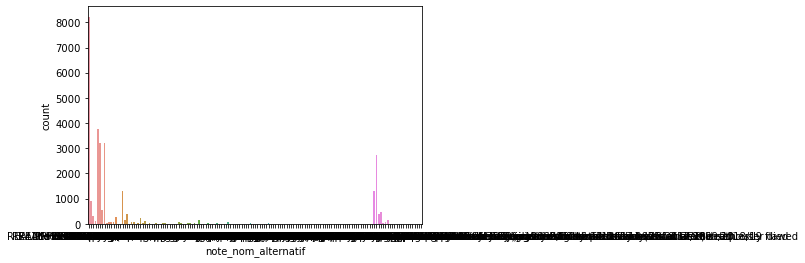

In [15]:
sns.countplot(x='note_nom_alternatif', data=df)

d:\docs\cours\m1\hmin232\env\lib\site-packages\seaborn\axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


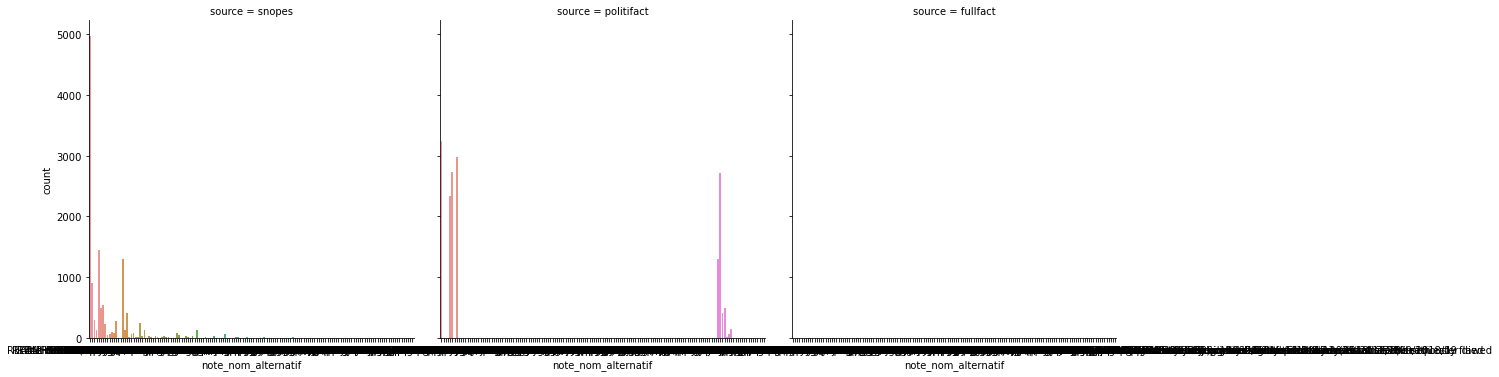

In [16]:
sns.catplot(x='note_nom_alternatif', col='source', kind='count', data=df)

In [17]:
def toLower(mot) :
    return str(mot).lower()

In [18]:
df["note_nom_alternatif"] = df["note_nom_alternatif"].apply(toLower)
df.sample(1)

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,pub_nom_auteur,date_publication,contenu,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
3985,510,politifact,"Says Bernie Sanders """"has reversed his position on immunity"""" for gun manufacturers and sellers.",2016-01-17,politifact,http://www.politifact.com/truth-o-meter/statements/2016/jan/18/hillary-clinton/fact-checking-gun-manufacturer-liability-bernie/,Hillary Clinton,2016-01-17,"In the increasingly competitive Democratic primary for president, former Secretary of State Hillary Clinton has spent months hammering Vermont Sen. Bernie Sanders for his vote on a 2005 bill that ...","https://www.govtrack.us/congress/votes/109-2005/h534,https://www.govtrack.us/congress/votes/108-2003/h124,https://berniesanders.com/press-release/sanders-supports-gun-safety-bill/,https://www.govt...","Guns,Legal Issues","Hillary Clinton correct that Bernie Sanders flip-flopped on liability for gun makers, sellers",true


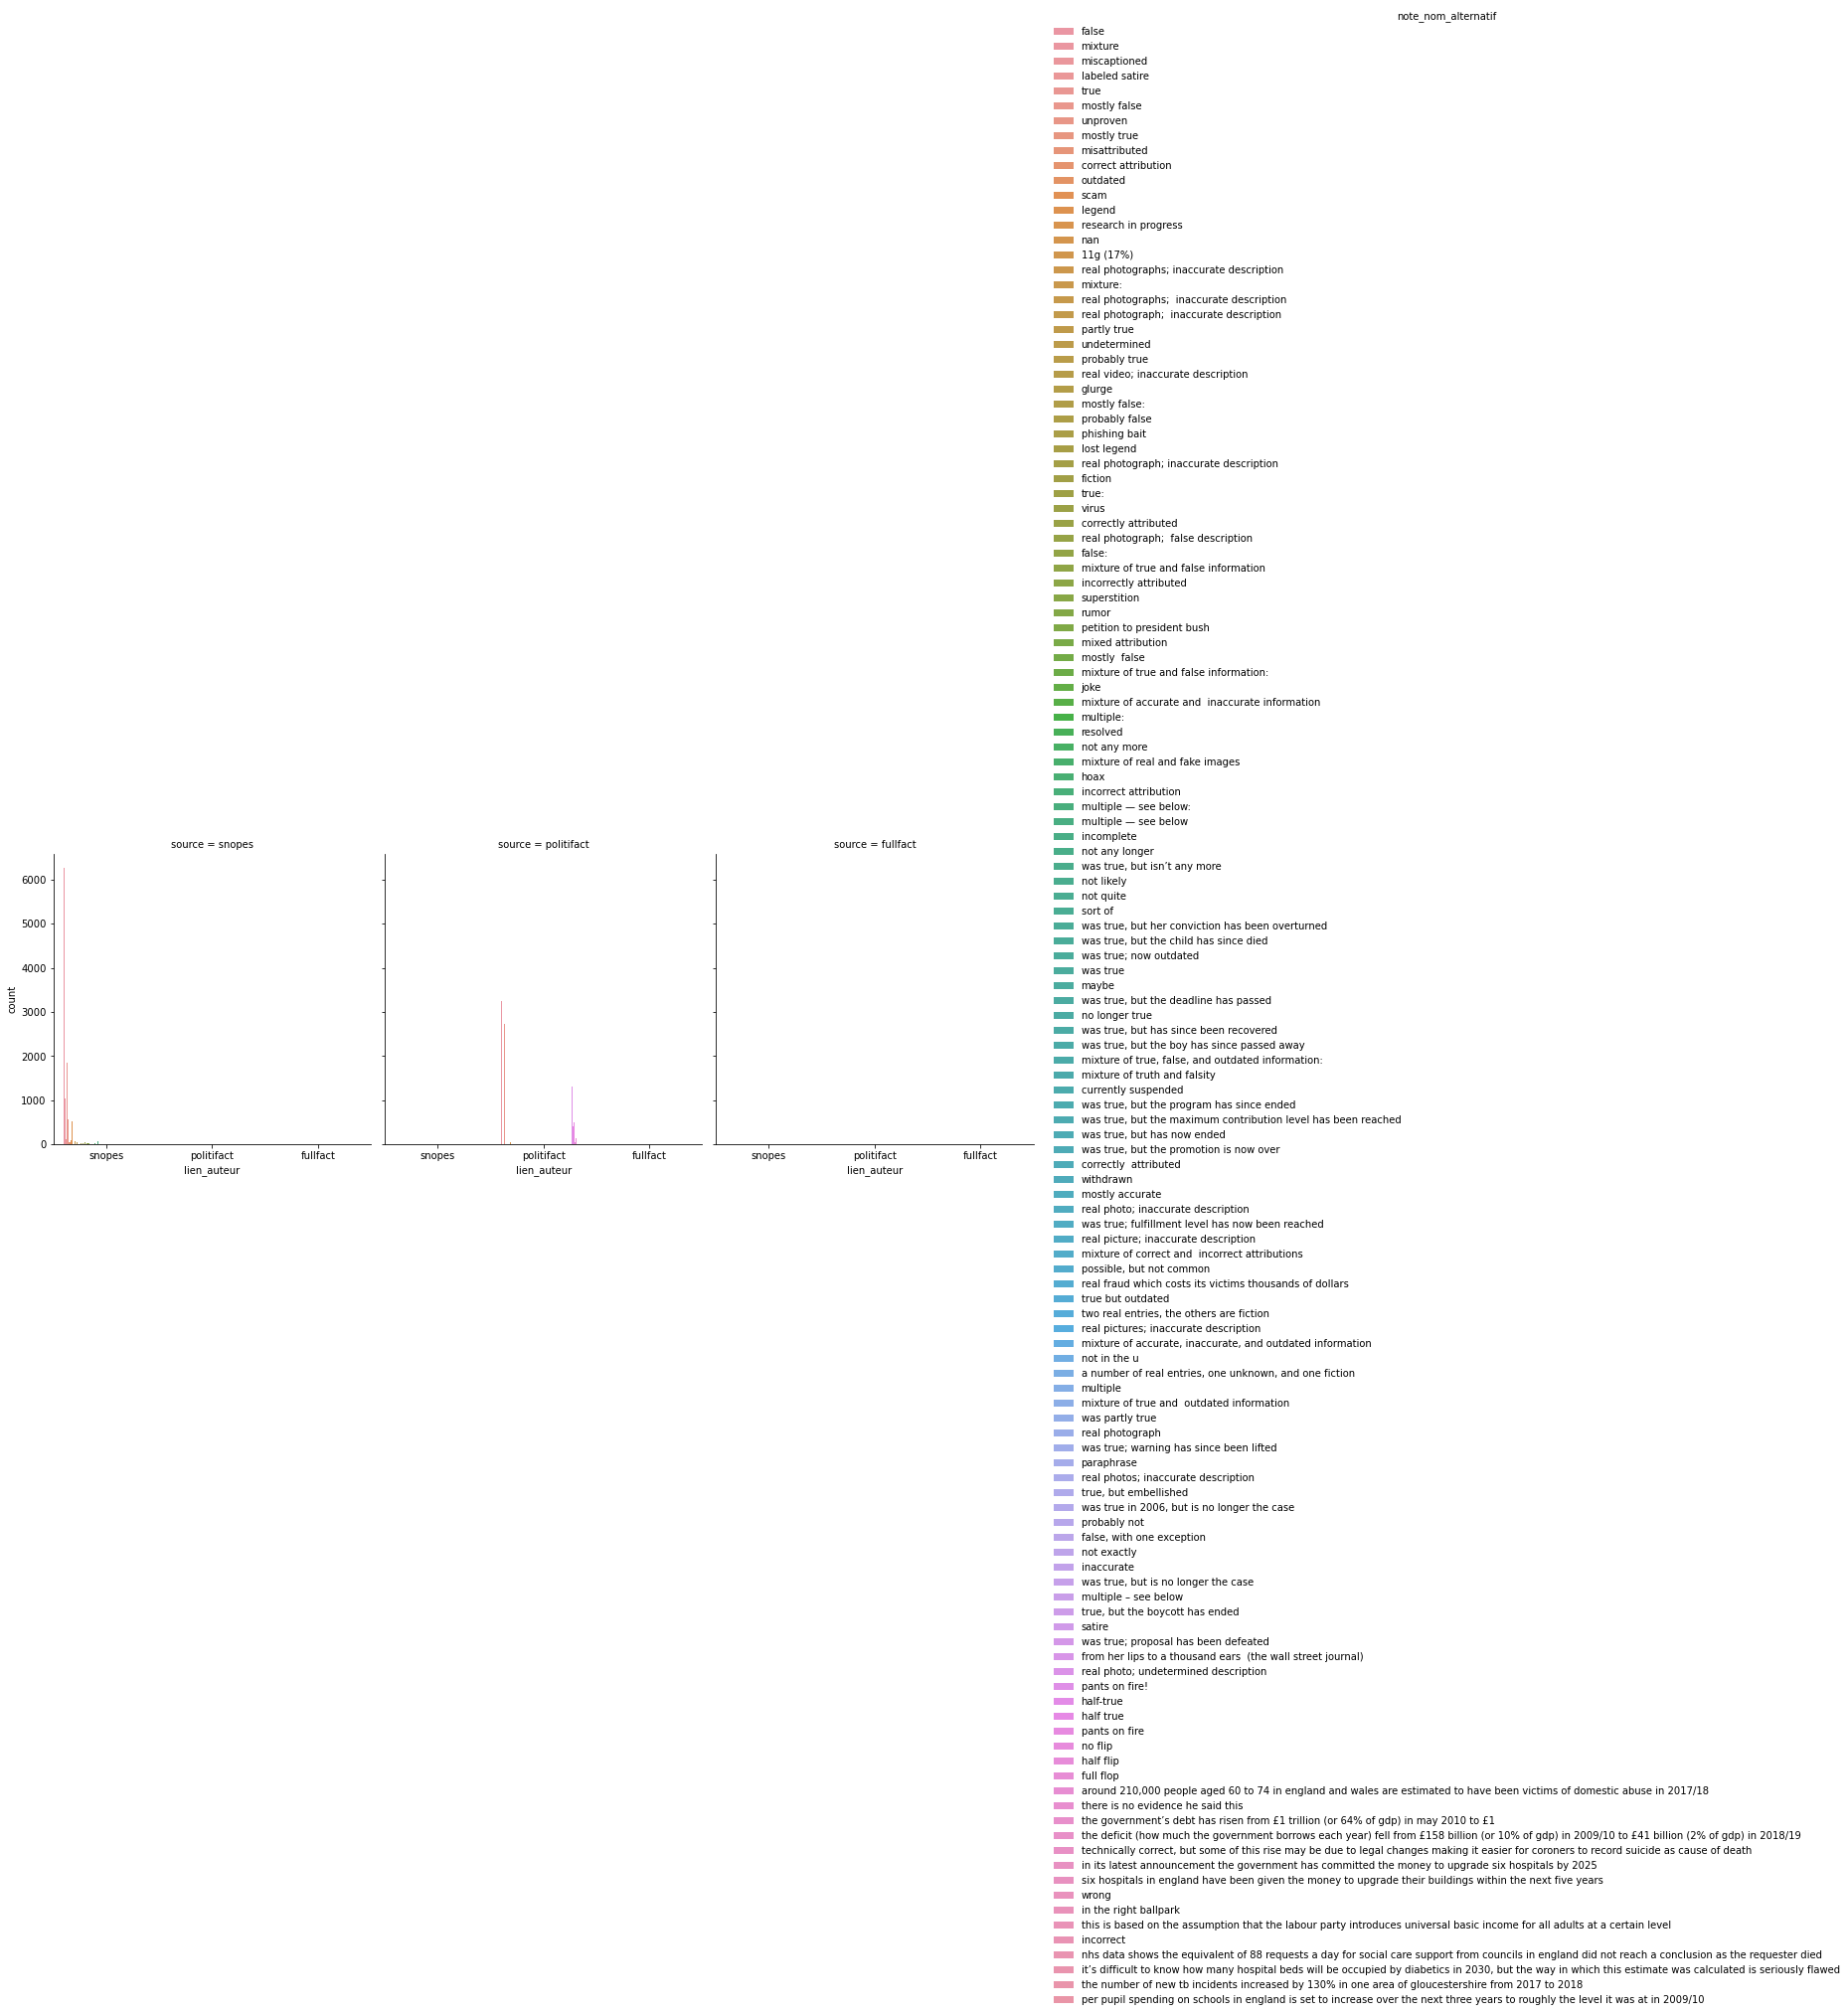

In [19]:
sns.catplot('lien_auteur',
data=df,
kind='count',
hue='note_nom_alternatif',
col='source')

In [20]:
df.info()
df2=df.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29279 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29279 non-null  int64 
 1   lien_auteur           29279 non-null  object
 2   reclamation_examinee  29279 non-null  object
 3   date_examination      28861 non-null  object
 4   source                29279 non-null  object
 5   lien                  29279 non-null  object
 6   pub_nom_auteur        16466 non-null  object
 7   date_publication      16442 non-null  object
 8   contenu               29251 non-null  object
 9   extra_lien_reference  25666 non-null  object
 10  extra_tags            27981 non-null  object
 11  extra_titre           29254 non-null  object
 12  note_nom_alternatif   29279 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.3+ MB


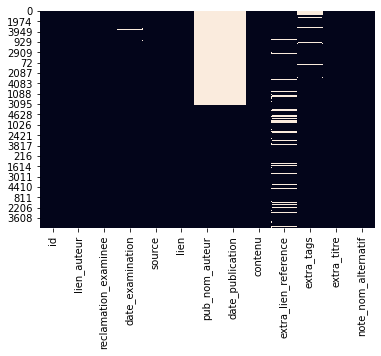

In [21]:
sns.heatmap(df2.isnull(), cbar=False)

In [22]:
del df2["extra_lien_reference"]
del df2["extra_tags"]

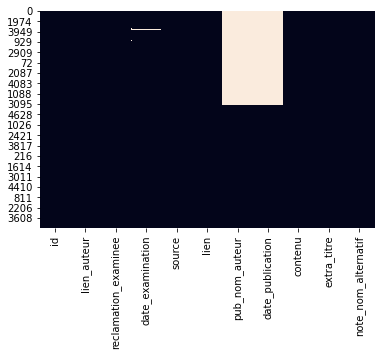

In [23]:
sns.heatmap(df2.isnull(), cbar=False)

In [24]:
df2['pub_nom_auteur']=df2['pub_nom_auteur'].fillna("ANONYME")

In [25]:
df2['date_publication'] = df2['date_publication'].fillna(df2["date_examination"])
df2['date_publication'] = pd.to_datetime(df2['date_publication'])

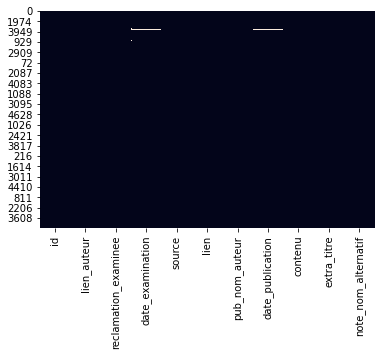

In [26]:
sns.heatmap(df2.isnull(), cbar=False)

In [27]:
df2=df2.dropna()
display(df2.sample(1))
display(df2.info())
display(df2.shape)

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,pub_nom_auteur,date_publication,contenu,extra_titre,note_nom_alternatif
953,7478,politifact,"""""[W]hen adjusted for cost of living, Georgia ranks first nationally in teacher salary and benefits.""""",2019-10-16,politifact,http://www.politifact.com/georgia/statements/2012/feb/22/jan-jones/ga-head-class-teacher-compensation/,Jan Jones,2012-02-06,"There’s apparently one major lesson that Georgia teachers should be sharing with their students.You can do better as a public school teacher here than any other state in America, says one influent...",Is Ga. at the head of the class in teacher compensation?,half-true


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28850 entries, 0 to 4967
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    28850 non-null  int64         
 1   lien_auteur           28850 non-null  object        
 2   reclamation_examinee  28850 non-null  object        
 3   date_examination      28850 non-null  object        
 4   source                28850 non-null  object        
 5   lien                  28850 non-null  object        
 6   pub_nom_auteur        28850 non-null  object        
 7   date_publication      28850 non-null  datetime64[ns]
 8   contenu               28850 non-null  object        
 9   extra_titre           28850 non-null  object        
 10  note_nom_alternatif   28850 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.7+ MB


None

(28850, 11)

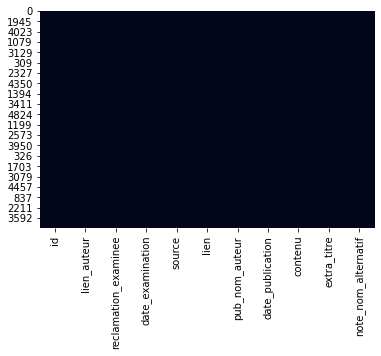

In [28]:
sns.heatmap(df2.isnull(), cbar=False)

# Plus aucune valeur nulle

# On supprime tout ce qui n'a pas comme note false/true/mixture

In [29]:
df21 = df2[df2.note_nom_alternatif == 'false']
df22 = df2[df2.note_nom_alternatif == 'true']
df23 = df2[df2.note_nom_alternatif == 'mixture']

df3 = pd.concat([df21, df22])
df3 = pd.concat([df3,df23])

In [30]:
df3.shape

(14426, 11)

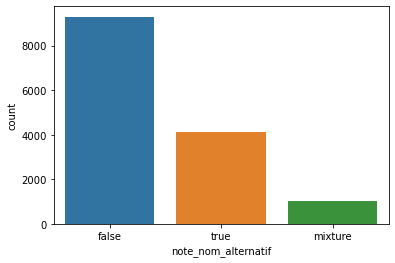

In [31]:
sns.countplot(x='note_nom_alternatif', data=df3)

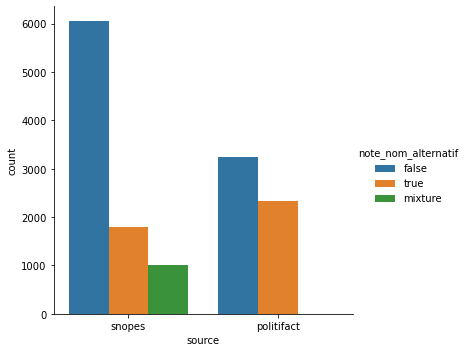

In [32]:
sns.catplot('source',
data=df3,
kind='count',
hue='note_nom_alternatif')

In [33]:
df3["source"] = class_label_encoder.fit_transform(df3["source"])

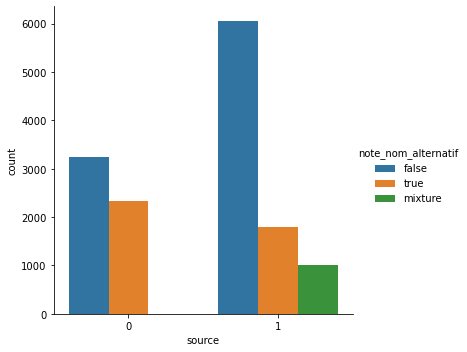

In [34]:
sns.catplot('source',
data=df3,
kind='count',
hue='note_nom_alternatif')

In [35]:
del df3["lien_auteur"]
del df3["id"]
del df3["lien"]

In [36]:
display(df3.sample(1))
df3.shape

,reclamation_examinee,date_examination,source,pub_nom_auteur,date_publication,contenu,extra_titre,note_nom_alternatif
3236,Photographs show a suspect who was decapitated by a wrought-iron fence while fleeing from police.,2003-03-03,1,ANONYME,2003-03-03,"The following item, about a man who was decapitated when he climbed over the railing of an interstate highway while fleeing police and fell onto a wrought-iron fence, describes a real incident tha...",Man Decapitated by Wrought Iron Fence,true


(14426, 8)

In [37]:
df3.to_csv('../Dataset/claim2.csv',sep=',', index=False)

# Sauvegarde 1

In [38]:
df4 = df3.copy()
display(df4.sample(1))
print(df4.shape)

,reclamation_examinee,date_examination,source,pub_nom_auteur,date_publication,contenu,extra_titre,note_nom_alternatif
4780,Infamous mother Casey Anthony has died at age 29.,2015-09-22,1,ANONYME,2015-09-22,"On 10 September 2015, the Breaking News 13 web site (later replaced by the similar Now8News web site) published an article reporting that Casey Anthony, who was controversially acquitted in 2011 o...",Was Casey Anthony Found Dead at Age 29?,false


(14426, 8)


In [39]:
df4["note_nom_alternatif"] = df4["note_nom_alternatif"].apply(toLower)
df4["date_examination"] = pd.to_datetime(df4["date_examination"])
df4["date_publication"] = pd.to_datetime(df4["date_publication"])

In [40]:
df4.sample(1)

,reclamation_examinee,date_examination,source,pub_nom_auteur,date_publication,contenu,extra_titre,note_nom_alternatif
4549,"A sanctuary for dogs is maintained on a """"dog island"""" off the coast of Florida.",2003-03-20,1,ANONYME,2003-03-20,"Although a spit of land in the eastern-most part of a chain of barrier islands located off the northern panhandle of Florida is known as Dog Island, it is not operated as a sanctuary where canines...",Is Dog Island Real?,false


In [41]:
df5 = df4.copy()
df5 = df5[["reclamation_examinee","pub_nom_auteur","date_examination", "date_publication", "source","contenu","note_nom_alternatif"]]
df5.rename(columns={"reclamation_examinee": "fact", "date_examination": "date_exam","note_nom_alternatif": "note" , "pub_nom_auteur" : "auteur_fact", "date_publication" : "date_fact"}, inplace=True)

In [42]:
display(df5.sample(1))
df5.shape

,fact,auteur_fact,date_exam,date_fact,source,contenu,note
1149,Photographs show a desert memorial constructed to honor the victims of UTA Flight 772.,ANONYME,2015-09-04,2015-09-04,1,"Claim: Photographs show a desert memorial constructed to honor the victims of UTA Flight 772.Claim:Claim:TRUETRUETRUETRUETRUETRUETRUEExample: [Collected via e-mail, November 2013]Example:Exa...",true


(14426, 7)

In [43]:
#transformation des dates et auteur pour les utiliser dans les classifieurs, à voir si utile ou pas
df5["auteur_fact_num"] = class_label_encoder.fit_transform(df5["auteur_fact"])

df5 = df5[["fact","auteur_fact","auteur_fact_num","date_fact","source","date_exam","contenu","note"]]

df5avcDate = df5.copy()
df5avcDate["date_exam"] = class_label_encoder.fit_transform(df5avcDate["date_exam"])
df5avcDate["date_fact"] = class_label_encoder.fit_transform(df5avcDate["date_fact"])

df5sansDate = df5.copy()
del df5sansDate["date_exam"]
del df5sansDate["date_fact"]

# Premier test classifieur

In [44]:
arraySD = df5sansDate.values
display(df5sansDate.sample(1))


arrayAD = df5avcDate.values
display(df5avcDate.sample(1))

,fact,auteur_fact,auteur_fact_num,source,contenu,note
3029,The National Rifle Association was formed for the express purpose of driving out the Ku Klux Klan and helping freed slaves defend themselves against racist attacks.,ANONYME,7,1,"Since its inception as a group dedicated to providing marksmanship training in 1871, the National Rifle Association has grown into a powerful lobbying organization with a single overriding purpose...",false


,fact,auteur_fact,auteur_fact_num,date_fact,source,date_exam,contenu,note
48,"""""Covfefe"""" means something, anything.",ANONYME,7,3751,1,3402,"On 31 May 2017 President Trump send a late-night tweet that began with a complaint about his press coverage and ended with the non-word “covfefe,” baffling many. While “covfefe” jokes proliferated...",false


In [45]:
# commenter/decommenter pour faire avec ou sans date

X = arraySD[:,[2,3]]
y = arraySD[:,5]

#X = arrayAD[:,2:5]
#y = arrayAD[:,7]



validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y,
train_size=validation_size,
random_state=seed,test_size=testsize)

In [46]:
clf = GaussianNB()
clf.fit(X_train, y_train)
result = clf.predict(X_test)
print('\n accuracy :',
accuracy_score(result, y_test),'\n')


 accuracy : 0.2668581047628478 



In [47]:
seed = 7
scoring = 'accuracy'
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFO', RandomForestClassifier()))



results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.553260 (0.397201)
DTC: 0.557067 (0.404499)
NB: 0.046661 (0.056453)
SVM: 0.514092 (0.419945)
RFO: 0.553741 (0.403935)


[Text(0, 0, 'KNN'),
 Text(0, 0, 'DTC'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'RFO')]

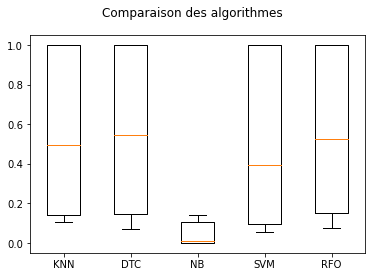

In [48]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# Découpage du fact en phrases ou mots (+suppr des non-alphanum)

In [49]:
df5.sample(1)

,fact,auteur_fact,auteur_fact_num,date_fact,source,date_exam,contenu,note
746,"As secretary of the Department of Energy under former President Bill Clinton, """"I created reserves of home heating oil.""""",Bill Richardson,186,2008-01-05,0,2019-10-13,"With oil prices setting record highs and hovering around $100 a barrel, most candidates talked during a Jan. 5, 2008, debate about what they would do to bring prices down. New Mexico Gov. Bill Ric...",true


In [50]:
pattern = re.compile('[\W_]+')


stop_words =["president","claim",'i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself',
            'yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself',
            'they','them','their','theirs','themselves','what','which','who','whom','this','that',
            'these','those','am','is','are','was','were','be','been','being','have','has','had',
            'having','do','does','did','doing','a','an','the','and','but','if','or','because','as',
            'until','while','of','at','by','for','with','about','against','between','into','through',
            'during','before','after','above','below','to','from','up','down','in','out','on','off',
            'over','under','again','further','then','once','here','there','when','where','why','how',
            'all','any','both','each','few','more','most','other','some','such','no','nor','not',
            'only','own','same','so','than','too','very','s','t','can','will','just','don','should',
            'now','uses','use','using','used','one','also',' ','',',','.','!','?',':','\'','\"','\"\"','\'\'','  ','\t','\s']


def que_alphanum(mot):
    return pattern.sub('', mot)


def toMots(row) :
    sans_contract = contractions.fix(row)
    tokens = word_tokenize(sans_contract)
    words = [que_alphanum(word) for word in tokens if word not in stop_words]
    return words



In [51]:
df5["fact_mots"] = df5["fact"].apply(toMots)
df5.sample(1)

,fact,auteur_fact,auteur_fact_num,date_fact,source,date_exam,contenu,note,fact_mots
4607,A photograph shows three buildings in New York decorated with window crosses for Easter in 1956.,ANONYME,7,2015-11-21,1,2015-11-21,"Example: [Collected via Facebook, November 2015]Example:[Collected via Facebook, November 2015]Collected via Facebook, November 2015The above-displayed image of buildings in the New York skyline i...",true,"[A, photograph, shows, three, buildings, New, York, decorated, window, crosses, Easter, 1956]"


In [52]:
df5.to_csv('../Dataset/claim3.csv',sep=',', index=False)

# Sauvegarde 2

In [53]:
df6 = df5.copy()
display(df6.sample(1))
print(df6.shape)

,fact,auteur_fact,auteur_fact_num,date_fact,source,date_exam,contenu,note,fact_mots
4428,Commentator Andy Rooney said God asked him to “tell your viewers that both Pat Robertson and Mel Gibson strike me as wackos.”,ANONYME,7,2011-11-05,1,2011-11-05,Claim: Commentator Andy Rooney said God asked him to “tell your viewers that both Pat Robertson and Mel Gibson strike me as wackos.” Claim:Claim:Status: True.Status: True.Status:Status:True....,true,"[Commentator, Andy, Rooney, said, God, asked, , tell, viewers, Pat, Robertson, Mel, Gibson, strike, wackos, ]"


(14426, 9)


In [54]:

wordnet_lemmatizer = WordNetLemmatizer()

def toMotLem(row) :
    listPhrase = []
    sans_contract = contractions.fix(row)
    phrases = sent_tokenize(sans_contract)
    tokens = [word_tokenize(phr) for phr in phrases]
    for token in tokens :
        for word in token :
            if (word not in stop_words) :
                listPhrase.append(que_alphanum(word))
    listLem = [wordnet_lemmatizer.lemmatize(listmot,pos='v') for listmot in listPhrase]
    return listLem

In [55]:
df6["fact_LEM"] = df6["fact"].apply(toMotLem)

In [56]:
# un peu long
# traitement de tous le contenu de tous les articles

df6["contenu"] = df6["contenu"].apply(toMotLem)

In [57]:
df6.sample(1)

,fact,auteur_fact,auteur_fact_num,date_fact,source,date_exam,contenu,note,fact_mots,fact_LEM
2274,Forwarding a certain e-mail to a specified number of your friends will cause a cool video to spring to life on your monitor or win cash for you.,ANONYME,7,2006-11-03,1,2006-11-03,"[Claim, Forwarding, certain, email, specify, number, friends, cool, video, spring, life, monitor, win, cash, Claim, Claim, Status, FalseStatus, FalseStatus, Status, FalseFalseFalseExamples, Exampl...",false,"[Forwarding, certain, email, specified, number, friends, cool, video, spring, life, monitor, win, cash]","[Forwarding, certain, email, specify, number, friends, cool, video, spring, life, monitor, win, cash]"


In [58]:
del df6["fact_mots"]
#del df6["fact"]

In [59]:
df6.to_csv('../Dataset/claim4.csv',sep=',', index=False)

# Sauvegarde 3

In [60]:
df7 = pd.read_csv('../Dataset/claim4.csv', sep=',', nrows = 5000)
print(df7.shape)

noms = ["fact", "auteur_fact","auteur_fact_num", "date_fact", "source", "date_exam", "contenu", "note","fact_LEM"]

df72 = pd.read_csv('../Dataset/claim4.csv', sep=',', names = noms, skiprows = 5000, nrows = 5000)
print(df72.shape)

df73 = pd.read_csv('../Dataset/claim4.csv', sep=',', names = noms, skiprows = 10000, nrows = 4420)
print(df73.shape)

(5000, 9)
(5000, 9)
(4420, 9)


In [61]:
df7 = pd.concat([df7, df72])
df7 = pd.concat([df7, df73])

display(df7.sample(1))
print(df7.shape)

,fact,auteur_fact,auteur_fact_num,date_fact,source,date_exam,contenu,note,fact_LEM
1454,"Says Donald Trump's foundation """"took money other people gave to his charity and then bought a six-foot-tall painting of himself.""""",Barack Obama,134,2016-09-13,0,2016-09-13,"['President', 'Barack', 'Obama', 'go', 'Philadelphia', 'Sept', '13', 'campaign', 'Hillary', 'Clinton', 'recover', 'pneumonia', 'In', 'speech', 'Obama', 'hold', 'back', 'critique', 'Clinton', '', '...",true,"['Says', 'Donald', 'Trumps', 'foundation', '', 'take', 'money', 'people', 'give', 'charity', 'buy', 'sixfoottall', 'paint']"


(14420, 9)


In [62]:
df7 = df7[["fact","fact_LEM","note","auteur_fact","auteur_fact_num","date_fact","source","date_exam","contenu"]]
df7.sample(1)

,fact,fact_LEM,note,auteur_fact,auteur_fact_num,date_fact,source,date_exam,contenu
750,Photograph shows sunrise through the World Trade Center towers.,"['Photograph', 'show', 'sunrise', 'World', 'Trade', 'Center', 'tower']",true,ANONYME,7,2002-03-29,1,2002-03-29,"['Claim', 'Photograph', 'show', 'sunrise', 'World', 'Trade', 'Center', 'towersClaim', 'Claim', 'Status', 'TrueStatus', 'TrueStatus', 'Status', 'TrueTrueTrueExample', '', 'Collected', 'Internet', '..."


In [63]:
mot_stop = ['10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1994', '1996', '1998', '1999', '20', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '50']
vectorizer = CountVectorizer(max_features=1000, min_df=0.1, max_df=0.7, stop_words = mot_stop)
vect = vectorizer.fit_transform(df7['contenu']).toarray()

# Les 1000 mots qui apparaissent le plus dans l'ensemble des articles

In [64]:
print(vectorizer.get_feature_names())

['able', 'accord', 'according', 'account', 'accurate', 'across', 'act', 'action', 'actually', 'add', 'additional', 'address', 'administration', 'after', 'agree', 'allow', 'almost', 'along', 'already', 'although', 'america', 'american', 'americans', 'among', 'amount', 'and', 'announce', 'another', 'anyone', 'anything', 'appear', 'april', 'around', 'article', 'as', 'ask', 'at', 'attack', 'attempt', 'august', 'available', 'away', 'back', 'barack', 'base', 'become', 'begin', 'believe', 'best', 'better', 'big', 'bill', 'bite', 'break', 'bring', 'business', 'but', 'call', 'campaign', 'candidate', 'care', 'case', 'center', 'change', 'charge', 'check', 'children', 'circulate', 'cite', 'city', 'claim', 'clear', 'close', 'collected', 'come', 'comment', 'common', 'company', 'concern', 'confirm', 'congress', 'consider', 'contain', 'continue', 'control', 'cost', 'could', 'country', 'course', 'cover', 'create', 'current', 'cut', 'data', 'date', 'day', 'days', 'deal', 'death', 'debate', 'december', '

In [65]:
df7.sample(1)

,fact,fact_LEM,note,auteur_fact,auteur_fact_num,date_fact,source,date_exam,contenu
2783,"Since Oregon’s prescription-only law took effect, meth lab incidents have dropped by 96 percent and meth-related arrests by 32 percent.","['Since', 'Oregon', '', 'prescriptiononly', 'law', 'take', 'effect', 'meth', 'lab', 'incidents', 'drop', '96', 'percent', 'methrelated', 'arrest', '32', 'percent']",true,Rob Bovett,1639,2011-03-28,0,2019-10-12,"['Oregon', 'get', 'press', 'recent', 'New', 'York', 'Times', 'articleabout', 'grow', 'methamphetamine', 'problem', 'Southern', 'Midwestern', 'state', 'efforts', 'stanch', 'itAccording', 'article',..."


In [66]:
def toVecto(row) :
    listRetour = vect[row]
    return listRetour

In [67]:
df7["row_index"] = df7.index
df7["lmpu"] = df7["row_index"].apply(toVecto)

In [68]:
df7.sample(1)

,fact,fact_LEM,note,auteur_fact,auteur_fact_num,date_fact,source,date_exam,contenu,row_index,lmpu
3418,"""""Bryce Reeves chaired a group bankrolled by a New York billionaire who fired hundreds of Virginia workers and sent their jobs to China.""""","['', '', 'Bryce', 'Reeves', 'chair', 'group', 'bankroll', 'New', 'York', 'billionaire', 'fire', 'hundreds', 'Virginia', 'workers', 'send', 'job', 'China']",False,Edd Houck,586,2011-09-29,0,2011-10-12,"['Democratic', 'State', 'Sen', 'Edd', 'Houck', 'DSpotsylvania', 'air', 'cable', 'television', 'ad', 'charge', 'Republican', 'opponent', 'Bryce', 'Reeves', 'be', 'OK', 'send', 'Virginia', 'job', 'o...",3418,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 6, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [69]:
df7 = df7[["fact","fact_LEM","note","auteur_fact","auteur_fact_num","date_fact","source","date_exam","lmpu","contenu"]]
#df7.rename(columns={"fact_LEM": "fact"}, inplace=True)
df7.sample(1)

,fact,fact_LEM,note,auteur_fact,auteur_fact_num,date_fact,source,date_exam,lmpu,contenu
390,The late Penny Marshall donated her entire estate to President Donald Trump's 2020 re-election campaign.,"['The', 'late', 'Penny', 'Marshall', 'donate', 'entire', 'estate', 'President', 'Donald', 'Trump', 's', '2020', 'reelection', 'campaign']",False,ANONYME,7,2018-12-18,1,2018-12-18,"[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, ...","['The', 'news', 'actress', 'director', 'Penny', 'Marshall', '', 'death', '18', 'December', '2018', 'mere', 'hours', 'old', 'word', 'begin', 'go', 'around', 'social', 'media', 'leave', 'entire', 'e..."


In [70]:
df7.to_csv('../Dataset/claim5.csv',sep=',', index=False)

# Deuxieme test classifieur

In [71]:
df7bis = df7.copy()
del df7bis["date_exam"]
del df7bis["date_fact"]
df7bis["note"] = df7bis["note"].apply(toLower)
df7bis.sample(1)

,fact,fact_LEM,note,auteur_fact,auteur_fact_num,source,lmpu,contenu
3714,"In October 2017, a """"demonic"""" drag queen read a """"sexually explicit"""" book to children at a Long Beach public library named after Michelle Obama.","['In', 'October', '2017', '', 'demonic', 'drag', 'queen', 'read', '', 'sexually', 'explicit', 'book', 'children', 'Long', 'Beach', 'public', 'library', 'name', 'Michelle', 'Obama']",mixture,ANONYME,7,1,"[0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 7, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, ...","['In', 'October', '2017', 'rightwing', 'web', 'sit', 'report', 'significant', 'degree', 'alarm', 'drag', 'queen', '', 'Sataninspired', 'costume', '', 'read', 'children', 'California', 'public', 'l..."


In [72]:
array = df7bis.values

#sans les dates
X = array[:,4:6]
y = array[:,2]

#avec les dates
#df7["date_exam"] = class_label_encoder.fit_transform(df7["date_exam"])
#df7["date_fact"] = class_label_encoder.fit_transform(df7["date_fact"])
#X = array[:,[4,6,8]]
#y = array[:,2]

In [73]:
df7.sample(1)

,fact,fact_LEM,note,auteur_fact,auteur_fact_num,date_fact,source,date_exam,lmpu,contenu
2219,"Ben Carson said abortions led to baby ghosts haunting hospitals, stealing medical supplies, and increasing healthcare costs.","['Ben', 'Carson', 'say', 'abortions', 'lead', 'baby', 'ghost', 'haunt', 'hospitals', 'steal', 'medical', 'supply', 'increase', 'healthcare', 'cost']",False,ANONYME,7,2016-12-07,1,2016-12-07,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","['Former', 'GOP', 'candidate', 'Ben', 'Carson', 'make', 'news', 'headline', 'December', '2016', 'Presidentelect', 'Donald', 'Trump', '', 'transition', 'team', 'announce', 'appointment', 'secretary..."


In [74]:
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=validation_size,random_state=seed,test_size=testsize)

In [75]:
clf = GaussianNB()
clf.fit(X_train, y_train)
result = clf.predict(X_test)
print('\n accuracy :',accuracy_score(result,y_test),'\n')
print(confusion_matrix(y_test,result))
print(classification_report(y_test,result))


 accuracy : 0.26243312859124235 

[[1148 4208 1152]
 [   0  684    0]
 [ 815 1270  817]]
              precision    recall  f1-score   support

       false       0.58      0.18      0.27      6508
     mixture       0.11      1.00      0.20       684
        true       0.41      0.28      0.34      2902

    accuracy                           0.26     10094
   macro avg       0.37      0.49      0.27     10094
weighted avg       0.50      0.26      0.28     10094



In [76]:
seed = 30
scoring = 'accuracy'
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFO', RandomForestClassifier()))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)
    print(cv_results)

KNN: 0.548613 (0.410415)
[1.         1.         1.         1.         0.74410541 0.2850208
 0.18099861 0.09084605 0.11581137 0.06934813]
DTC: 0.558114 (0.404283)
[1.         1.         1.         1.         0.74965326 0.35090153
 0.17545076 0.09292649 0.14008322 0.07212205]
NB: 0.046671 (0.056550)
[0.         0.         0.         0.         0.12690707 0.02149792
 0.1407767  0.11719834 0.         0.06033287]
RFO: 0.554716 (0.404585)
[1.         1.         1.         1.         0.740638   0.31622746
 0.16712899 0.0998613  0.14771151 0.07558946]


[Text(0, 0, 'KNN'), Text(0, 0, 'DTC'), Text(0, 0, 'NB'), Text(0, 0, 'RFO')]

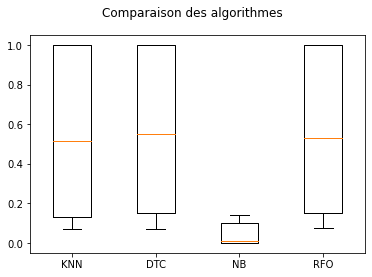

In [77]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [78]:
# /////////////////////
# ///// KNN //////////
# ////////////////////

grid_paramKNN = {'n_neighbors': [5,10,20,38],
'weights' : ['uniform', 'distance'],
'metric' : ['euclidean','manhattan']
}

gd_srKNN = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=grid_paramKNN,
scoring='accuracy',cv=5,n_jobs=-1,iid=True,return_train_score=True)

gd_srKNN.fit(X_train, y_train)
print ('meilleur score ',gd_srKNN.best_score_,'\n')
print ('meilleurs paramètres',gd_srKNN.best_params_,'\n')

meilleur score  0.6490984743411928 

meilleurs paramètres {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'} 



In [79]:
# /////////////////////
# ///// RFO //////////
# ////////////////////

grid_paramRFO = {'n_estimators': [8,9,10],
'max_features': ['log2', 'sqrt'],
'criterion': ['entropy', 'gini'],
'max_depth': [2,3,4,5,6],
'min_samples_split': [2,3,4,5,6,7],
'min_samples_leaf': [4,5,6]
}

gd_srRFO = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid_paramRFO,
scoring='accuracy',cv=5,n_jobs=-1,iid=True,return_train_score=True)

gd_srRFO.fit(X_train, y_train)
print ('meilleur score ',gd_srRFO.best_score_,'\n')
print ('meilleurs paramètres',gd_srRFO.best_params_,'\n')

meilleur score  0.6523347202958854 

meilleurs paramètres {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 10} 



In [80]:
# /////////////////////
# ///// DTC //////////
# ////////////////////

grid_paramDTC = {
'splitter' : ['best','random'],
'criterion' : ['gini', 'entropy'],
'min_samples_leaf': [30,35,40],
'min_samples_split' : [1,2,3,4,5,10]
}

gd_srDTC = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid_paramDTC,
scoring='accuracy',cv=10,n_jobs=-1,iid=True,return_train_score=True)

gd_srDTC.fit(X_train, y_train)

print ('meilleur score ',gd_srDTC.best_score_,'\n')
print ('meilleurs paramètres', gd_srDTC.best_params_,'\n')

meilleur score  0.6495607951918632 

meilleurs paramètres {'criterion': 'gini', 'min_samples_leaf': 35, 'min_samples_split': 2, 'splitter': 'best'} 



# Enregistrement du meilleur modèle (DTC)

In [81]:
clf = gd_srDTC.best_estimator_

with open('fact_model.sav', 'wb') as myfile:
    pickle.dump(clf,myfile)

# Chargement et execution du modèle

In [82]:
clf_loaded = pickle.load(open('fact_model.sav', 'rb'))
print ('Modèle chargé',clf_loaded,'\n')
result = clf_loaded.predict(X_test)

print('\n accuracy:\n')
print (accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, result))

Modèle chargé DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 


 accuracy:

0.6374083614028135 


 matrice de confusion 
 [[5694    0  814]
 [ 684    0    0]
 [2162    0  740]]

               precision    recall  f1-score   support

       false       0.67      0.87      0.76      6508
     mixture       0.00      0.00      0.00       684
        true       0.48      0.25      0.33      2902

    accuracy                           0.64     10094
   macro avg       0.38      0.38      0.36     10094
weighted avg       0.57      0.64      0.58     10094



d:\docs\cours\m1\hmin232\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
